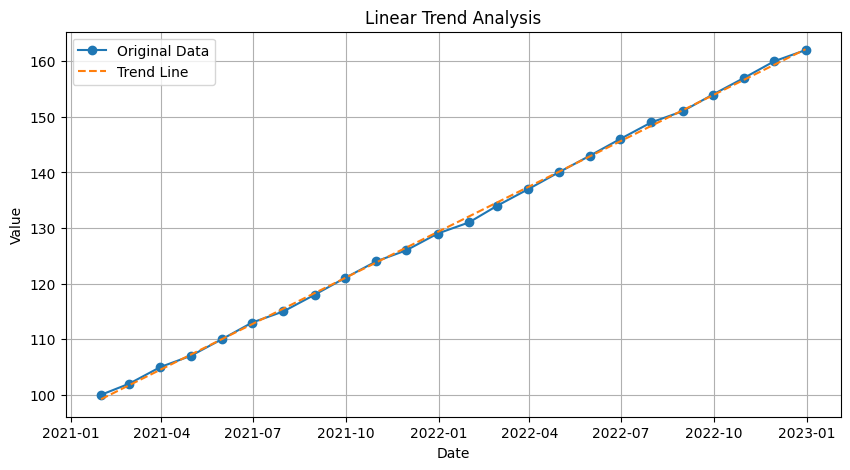

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample time-series data
data = {
    'date': pd.date_range(start='2021-01-01', periods=24, freq='ME'),
    'value': [100, 102, 105, 107, 110, 113, 115, 118, 121, 124, 126, 129,
              131, 134, 137, 140, 143, 146, 149, 151, 154, 157, 160, 162]
}
df = pd.DataFrame(data)

# Convert date to ordinal for regression (numeric time)
df['time_index'] = df['date'].map(pd.Timestamp.toordinal)

# Reshape for sklearn
X = df['time_index'].values.reshape(-1, 1) #example (100, 1) for data item 100
y = df['value'].values

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict trend line
df['trend'] = model.predict(X)

# Plot original data and trend
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['value'], label='Original Data', marker='o')
plt.plot(df['date'], df['trend'], label='Trend Line', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Trend Analysis')
plt.legend()
plt.grid(True)
plt.show()


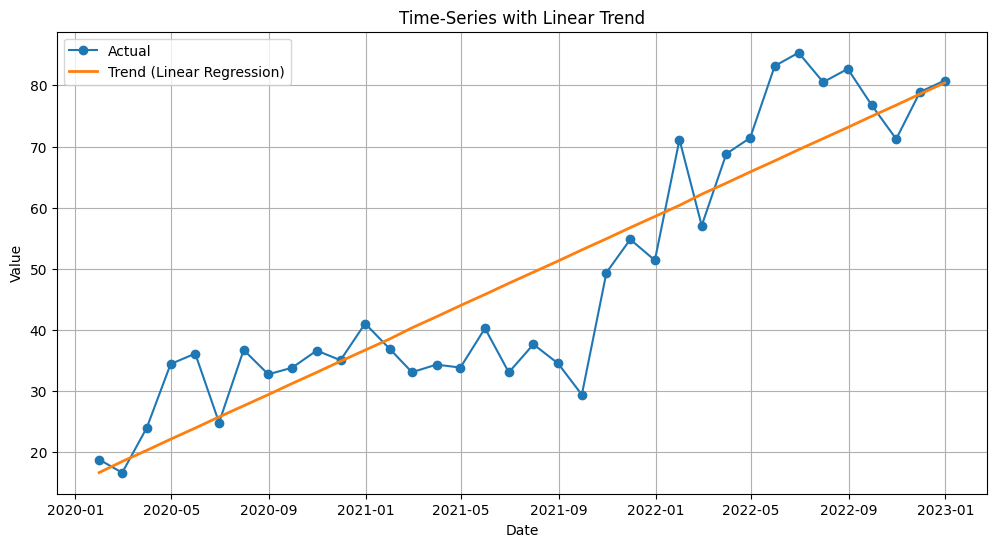

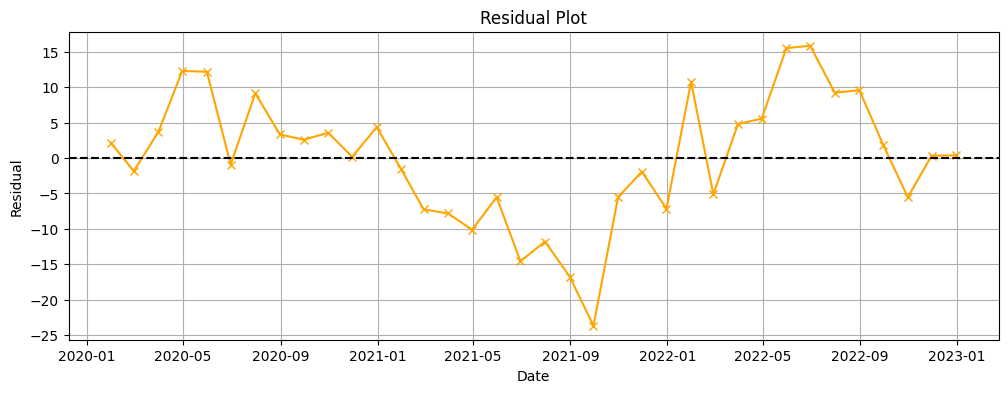

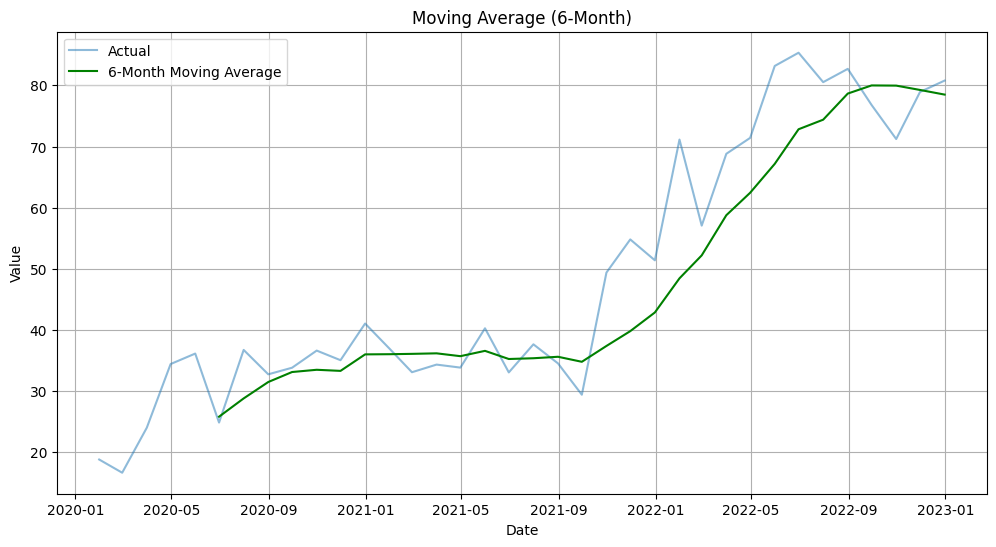

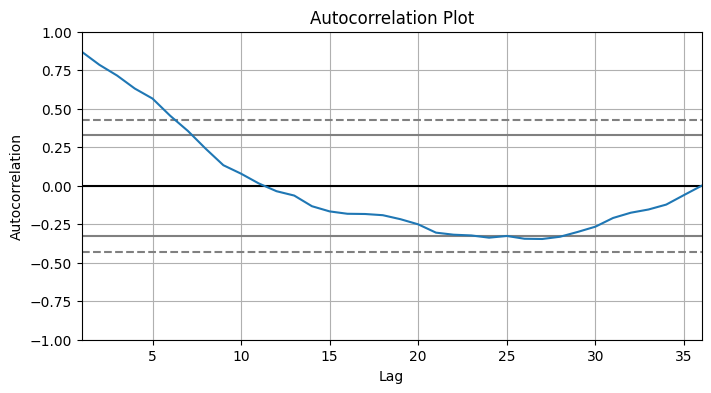

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot

# Simulate Time-Series Data
np.random.seed(0)
months = pd.date_range(start='2020-01-01', periods=36, freq='ME')
trend = 2 * np.arange(len(months)) + 10
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, len(months)))
noise = np.random.normal(loc=0, scale=5, size=len(months))
values = trend + seasonality + noise

df = pd.DataFrame({'Date': months, 'Value': values})
df['TimeIndex'] = np.arange(len(df))

# Fit Linear Regression
model = LinearRegression()
model.fit(df[['TimeIndex']], df['Value'])
df['Trend'] = model.predict(df[['TimeIndex']])
df['Residuals'] = df['Value'] - df['Trend']

# Plot Actual vs Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Actual', marker='o')
plt.plot(df['Date'], df['Trend'], label='Trend (Linear Regression)', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time-Series with Linear Trend')
plt.legend()
plt.grid(True)
plt.show()

# Plot Residuals
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Residuals'], label='Residuals', color='orange', marker='x')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Moving Average Plot
df['MovingAvg_6'] = df['Value'].rolling(window=6).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Actual', alpha=0.5)
plt.plot(df['Date'], df['MovingAvg_6'], label='6-Month Moving Average', color='green')
plt.title('Moving Average (6-Month)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(8, 4))
autocorrelation_plot(df['Value'])
plt.title('Autocorrelation Plot')
plt.grid(True)
plt.show()
